<a href="https://colab.research.google.com/github/nunosilva12345/Thesis-AutomaticFireDetectionCNN/blob/main/CHANGE_____MELHOR_UPD_BD_CHANGE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#com MELHOR-ANTIGA-BD
#MELHOR_BD_UPDATE
TRAINING_DIR = '/content/drive/MyDrive/Colab Notebooks/MINHA/MINHA/MELHOR_BD_UPDATE/Training'
training_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.15, horizontal_flip=True, fill_mode='nearest')

VALIDATION_DIR = '/content/drive/MyDrive/Colab Notebooks/MINHA/MINHA/MELHOR_BD_UPDATE/Validation'
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory( TRAINING_DIR, target_size=(224,224), shuffle = True, class_mode='categorical', batch_size = 64)
validation_generator = validation_datagen.flow_from_directory( VALIDATION_DIR, target_size=(224,224), class_mode='categorical', shuffle = True, batch_size= 25)

Mounted at /content/drive
Found 1835 images belonging to 2 classes.
Found 311 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(64, (11,11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Conv2D(512, (5,5), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Dense(2048, activation='relu'),#512 e 256 testar
tf.keras.layers.Dropout(0.4),#ANTES 2048,1024
tf.keras.layers.Dense(1024, activation='relu'),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(2, activation='softmax')])
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['acc'])

model.summary()
##30-100, quando vim ca 1 vez
##tentativa 55-50epochs


In [ ]:
history = model.fit(
train_generator,
steps_per_epoch = 25,
epochs = 40,
validation_data = validation_generator,
validation_steps = 5
)

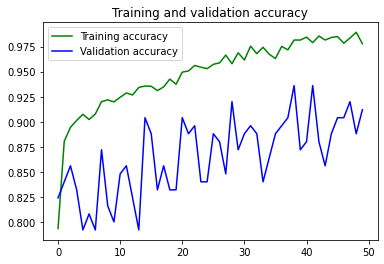

<Figure size 432x288 with 0 Axes>

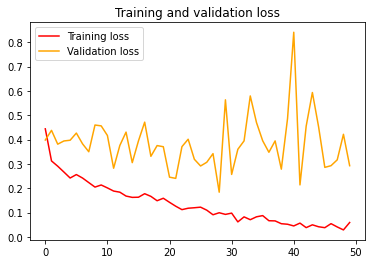

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:

train_loss , train_acc = model.evaluate(train_generator, steps=16)
val_loss , val_acc = model.evaluate(validation_generator, steps=14)

print("Restored model, lossTrain: {:5.2f}".format(train_loss))
print("Restored model, accuracyTrain: {:5.2f}%".format(100 * train_acc))
print("-----------------------------------------------------------------")
print("Restored model, lossVal: {:5.2f}".format(val_loss))
print("Restored model, accuracyVal: {:5.2f}%".format(100 * val_acc))


14/14 [==============================] - 14s 997ms/step - loss: 0.4355 - acc: 0.8943
Restored model, lossTrain:  0.05
Restored model, accuracyTrain: 97.75%
-----------------------------------------------------------------
Restored model, lossVal:  0.44
Restored model, accuracyVal: 89.43%


In [ ]:

fname = "/content/drive/MyDrive/Colab Notebooks/MINHA/MINHA/MELHOR_BD_UPDATE/SAVES/3/weights-Test-CNN.hdf5"
outro = "/content/drive/MyDrive/Colab Notebooks/MINHA/MINHA/MELHOR_BD_UPDATE/SAVES/3/cp.ckpt"
model.save_weights(fname,overwrite=True)
model.save_weights(outro,overwrite=True)

model.save('/content/drive/MyDrive/Colab Notebooks/MINHA/MINHA/MELHOR_BD_UPDATE/SAVES/3')


json_str = model.to_json()

In [ ]:
# Loads the weights
fname = "/content/drive/MyDrive/Colab Notebooks/MINHA/MINHA/MELHOR_BD_UPDATE/SAVES/3/weights-Test-CNN.hdf5"

model.load_weights(fname)
model.get_weights()

[array([[[[-1.33416504e-02, -1.01817558e-02,  1.70539692e-02, ...,
            4.65673301e-03, -1.68283582e-02,  1.42444288e-02],
          [ 9.48429760e-03, -7.55306147e-03,  1.34643326e-02, ...,
           -1.57250576e-02, -3.77497892e-03, -1.28642675e-02],
          [ 3.64525756e-03,  1.00749079e-02, -2.23180503e-02, ...,
           -2.06967723e-02,  1.64629817e-02,  2.27546785e-02]],
 
         [[-2.61667240e-02,  3.11908661e-03,  2.41415240e-02, ...,
            9.42229293e-03, -9.00513027e-03, -1.00927027e-02],
          [ 4.00753459e-03, -5.81146334e-04,  1.15382234e-02, ...,
            2.34523211e-02,  1.74616352e-02,  1.56076280e-02],
          [-2.92780879e-03, -1.53349852e-02, -1.71889625e-02, ...,
           -1.56760179e-02,  7.47365691e-03,  7.60916295e-03]],
 
         [[-1.26065956e-02, -4.98315739e-03, -1.93587337e-02, ...,
           -1.66749302e-02,  1.08332920e-03, -2.60026045e-02],
          [ 4.11824370e-03, -1.94250401e-02, -1.63104013e-02, ...,
            2.143

In [ ]:
import matplotlib.pyplot as plt


def plot_conv_weights(model, layer_name):
    W = model.get_layer(name=layer_name).get_weights()[0]
    #we normalie them
    w_min, w_max = W.min(), W.max()
    W = (W - w_min) / (w_max - w_min)
    if len(W.shape) == 4:
        W = W.reshape((W.shape[0], W.shape[1], W.shape[2]*W.shape[3]))
        fig, axs = plt.subplots(8,4, figsize=(15,15))
        fig.subplots_adjust(hspace = .5, wspace=.001)
        axs = axs.ravel()
        for i in range(W.shape[2]):
            a=axs[i].imshow(W[:,:,i], cmap= 'gray')
            axs[i].set_title('Filter ' + str(i+1))

#modelo = tf.keras.models.load_model('0.1ConvDropCNN_128_64_best.h5')
plot_conv_weights(model, 'conv2d')#nome primeira layer conv

In [ ]:

import numpy as np
from google.colab import files
from keras.preprocessing import image
import tensorflow.compat.v2 as tf

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = tf.keras.preprocessing.image.load_img(path, target_size=(224, 224))
  x = tf.keras.preprocessing.image.img_to_array(img)
  x = np.expand_dims(x, axis=0) /255
  classes = model.predict(x)
  print(np.argmax(classes[0])==0, max(classes[0]))

Saving 2c9de895-9d16-48d4-b5ce-14055e5bb06b.jpg to 2c9de895-9d16-48d4-b5ce-14055e5bb06b (4).jpg
1/1 [==============================] - 1s 566ms/step
True 0.998697


In [ ]:
tf.keras.utils.plot_model(model, 'model.png')

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#com MELHOR-ANTIGA-BD
#MELHOR_BD_UPDATE
TRAINING_DIR = '/content/drive/MyDrive/Colab Notebooks/MINHA/MINHA/MELHOR_BD_UPDATE/Training'
training_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.15, horizontal_flip=True, fill_mode='nearest')

VALIDATION_DIR = '/content/drive/MyDrive/Colab Notebooks/MINHA/MINHA/MELHOR_BD_UPDATE/Validation'
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory( TRAINING_DIR, target_size=(224,224), shuffle = True, class_mode='categorical', batch_size = 64)
validation_generator = validation_datagen.flow_from_directory( VALIDATION_DIR, target_size=(224,224), class_mode='categorical', shuffle = True, batch_size= 25)

from tensorflow.keras.optimizers import Adam
import tensorflow as tf

model1 = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(64, (11,11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Conv2D(512, (5,5), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Dense(2048, activation='relu'),#512 e 256 testar
tf.keras.layers.Dropout(0.4),#ANTES 2048,1024
tf.keras.layers.Dense(1024, activation='relu'),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(2, activation='softmax')])
model1.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['acc'])

# Loads the weights
fname = "/content/drive/MyDrive/Colab Notebooks/MINHA/MINHA/MELHOR_BD_UPDATE/SAVES/3/weights-Test-CNN.hdf5"

model1.load_weights(fname)
model1.get_weights()
##30-100, quando vim ca 1 vez
##tentativa 55-50epo